In [1]:
%load_ext autoreload
%autoreload 2

### Preprocessing scmultiome data from Curtis Boswell.
Analysis of single nuclear expression data only.

Modeling vertebrate organogenesis in zebrafish across 3 timepoints (12hr, 18hr, 24hr).

Matched ATAC data is available for each cell.

Aim: map transcription factor activation controlling lineage differentiation during vertebrate orgnogenesis.

In [2]:
import os
from degex.preprocessing import (
    prepare_h5ad_file,
    filter_pipeline,
    normalization_pipeline,
    embedding_pipeline,
)

In [3]:
from degex.types import OBS_BATCH

In [4]:
DATA_DIR = os.path.abspath('../data')
def make_filename(hr:str, data_dir:str=DATA_DIR):
    rootname = 'scmultiome_121824_seq2'
    return os.path.join(
        data_dir, 
        f'{rootname}_{hr}_cr200_run1',
        'filtered_feature_bc_matrix.h5'
    )

f1 = make_filename('12h')
f2 = make_filename('18h')
f3 = make_filename('24h')

/Users/sumner/miniforge3/envs/spot-mark-gene/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.62
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 3.8%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 8.2%
Elapsed time: 1.4 seconds


/Users/sumner/miniforge3/envs/spot-mark-gene/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.60
Detected doublet rate = 0.6%
Estimated detectable doublet fraction = 6.4%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 8.8%
Elapsed time: 3.2 seconds


/Users/sumner/miniforge3/envs/spot-mark-gene/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.59
Detected doublet rate = 0.7%
Estimated detectable doublet fraction = 6.5%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 11.4%
Elapsed time: 1.2 seconds


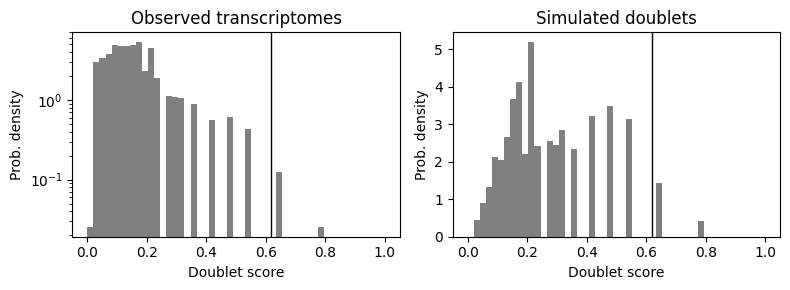

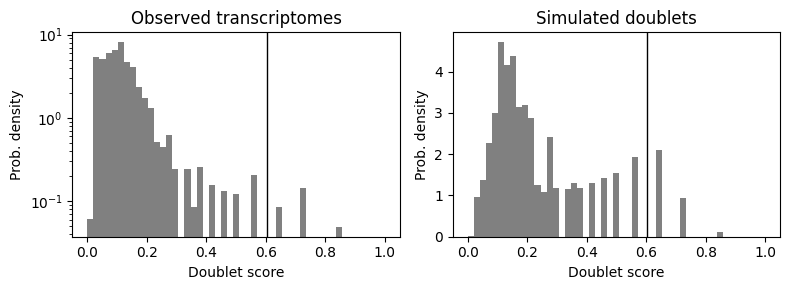

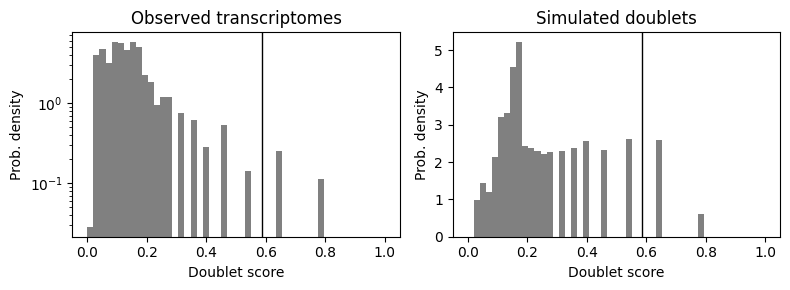

In [5]:
sdata1 = prepare_h5ad_file(f1, plot=True)
sdata2 = prepare_h5ad_file(f2, plot=True)
sdata3 = prepare_h5ad_file(f3, plot=True)

In [6]:
from degex.adata import (
    combine_timepoints, add_gene_annotations,
    calc_qc_stats
) 

In [7]:
adata = combine_timepoints(
    sdata1, sdata2, sdata3, 
    idx_to_time={'0': '12hr', '1': '18hr', '2': '24hr'},
    print_counts=True
)

18hr    4056
12hr    1944
24hr    1748
Name: batch, dtype: int64


In [8]:
adata = add_gene_annotations(
    adata, 
    os.path.join(DATA_DIR, 'genes', 'Gene_annotation.csv'),    
)

In [9]:
adata = calc_qc_stats(adata)

ValueError: Length of values (1) does not match length of index (7748)